# How to predict CLTV for Shopify Stores with Machine Learning.

<div>
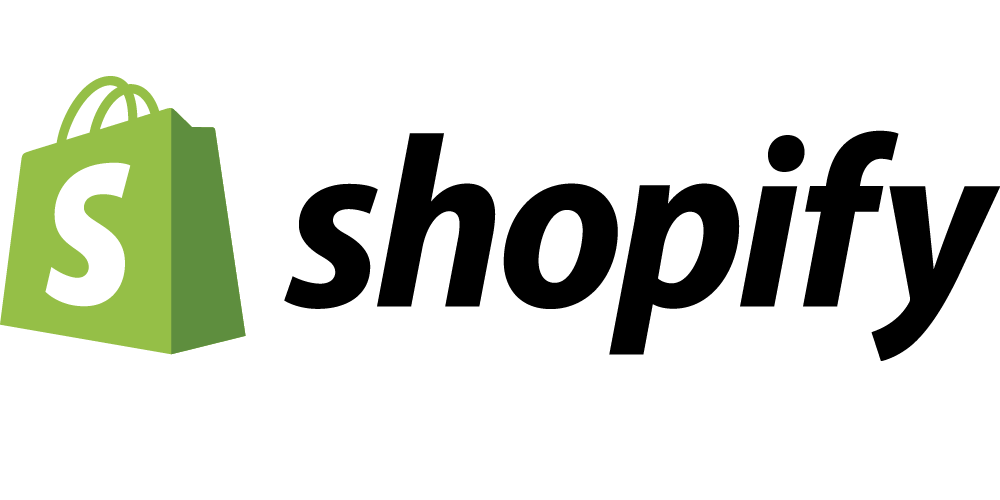
</div>

###  Project Table of Contents: 
<br> Items in blue are addressed in this notebook. The Data Wrangling in this notebook will be different as it will incorporate the findings from the previous notebook.

<br> **I. INTRODUCTION \& PRELIMINARY ANALYSIS**
- 1. Project Purpose </font>  
- 2. Loading \& Previewing Data </font>  
- 3. Data Wrangling </font>  
- 4. Preliminary EDA </font>  
    

<br> **II. DATA WRANGLING**  
- 1. Cleaning up data. 
- 2. Creating 3 separate dataframes.
- 3. Creating the final 1 year CLTV Table.


<br> <font color='blue'>  **III. EXPLORATORY DATA ANALYSIS**  
- <font color='blue'> 1. </font>  
- <font color='blue'> 2. </font>  

<br> **IV. PREPROCESSING AND TRAINING DATA** 
- 1.
- 2.

<br> **V. MODELLING**  
- 1.
- 2.

<br> **VI. CONCLUSIONS** 
- 1.
- 2. 

# I. Introduction: 

## 1. Project Purpose.



<p> Welcome to this Tutorial on Extracting Shopify Data to create a Customer Lifetime Value (CLTV) Analysis! This notebook will walk you through the steps so you too can replicate this for your business! 

<p> As of 2021, e-commerce is, worldwide, a $4.89 trillion industry. One of the leading platforms in the marketplace is Shopify which currently holds a 23% market share in the United States with over 2.6 million live stores. For Perspective, there is about 1 store for every 130 Americans. With e-commerce expected to keep growing in the future, it is important for current and future Shopify store-owners to get the most use  of the available data the platform provides.
This project will apply the Data Science method to learn more about customer behavior  and create a Customer Lifetime Value Analysis (CLTV) with some Machine Learning techniques from Shopify Data. The purpose will be to understand what makes customers become repeat customers and use the information collected to generate more revenue by increasing LTV. 

<p> Shopify data is usually standardized when exporting orders in csv format. In this dataset, the original raw export is  organized where each row represents an item sold with ~73 columns that provide information on the item purchased. Most of these will not be useful for this analysis and dropped early on. 

<br> **Featured columns include:**

- *Name*: This refers to the Order Id. This is not unique, as there can be multiple items in one order. 
- *Email*: This is the email of the customer, which is used to identify a customer. 
- *Paid at*: This column refers to the time and date the transaction occurred. There is only one date for each Order, so it is normal if there are blanks provided. Other columns follow this logic 
- *Subtotal*: This refers to the subtotal for each order.  
- *Lineitem name*: This refers to the name of the product. Typically, a store sets up the product name where we can get information such as the size, type and color of the product in question. This column should never be empty. 
- *Line Item Quantity and Line Item Price*: These columns design how much of each item and their price, respectively, and shouldn’t contain missing values. 

How a shopify store is organized to collect data may result in possible missing values or incomplete transactions(as was the case for this company). The analysis will clean some data but assumes that there are no missing values in the “Created at”,  “Lineitem name”, and “LineItem Price” columns since all of these refer to each individual item sold and if there is missing data in these, they will need to be dropped. For a more detailed guide on understanding shopify data and more details on the columns, please refer to this sheet.
The data used for this analysis comes from a real company which generated $1 million in YTD revenue. The data has been modified from its original version to protect the anonymity of the company as well as the information of all its customers. 

<br> The original export file which will be analyzing  has been modified with the following alterations: 

- Columns *“Billing Name “ , “ Billing Street“ , “Billing Address1 “ , “Billing Address2 “ , “Billing Company “ , “Billing Phone “ , “Shipping Name “ , “ Shipping Street“ , “Shipping Address1 “ , “Shipping Address2 “ , “Shipping Company “ , “Shipping Phone “*  have all been replaced with null values. These columns will not be used in the analysis and dropped early on shortly after the introduction .
- Values in the *“Email”* column have been replaced with a unique Email Id for each customer instead of their actual emails. 
- Column *“Line-item name”* has substituted product names. 

### 1. Loading our packages and Dataframe. 

In [1]:
## We start by importing the appropriate packages which we will want to use. 
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
from datetime import timedelta
import seaborn as sns
import warnings
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing
%matplotlib inline
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
customer_cltv = pd.read_csv('.\..\cleaned_data.csv',index_col=0)

In [3]:
customer_cltv.head()

,CustomerID,pfw_spent,fw_nb_orders,fw_nb_items,fw_total_spent,fw_used_coupon,first_order_month,fw_purchased_accessory,first_item_size,accepts_marketing,wealthy_zip,region,first_item_price_range
0,Anonymous13455,1257.80,1,1,50.0,0,6,0,M,0,0,MW,high
1,Anonymous2142,436.15,1,1,48.0,0,5,0,L,0,0,NE,high
2,Anonymous4843,1052.75,2,2,96.0,0,10,0,S,1,0,W,high
3,Anonymous11225,728.10,1,1,16.0,0,1,1,No size,0,0,MW,low
4,Anonymous540,1114.75,1,1,50.0,0,1,0,XS,0,0,W,high


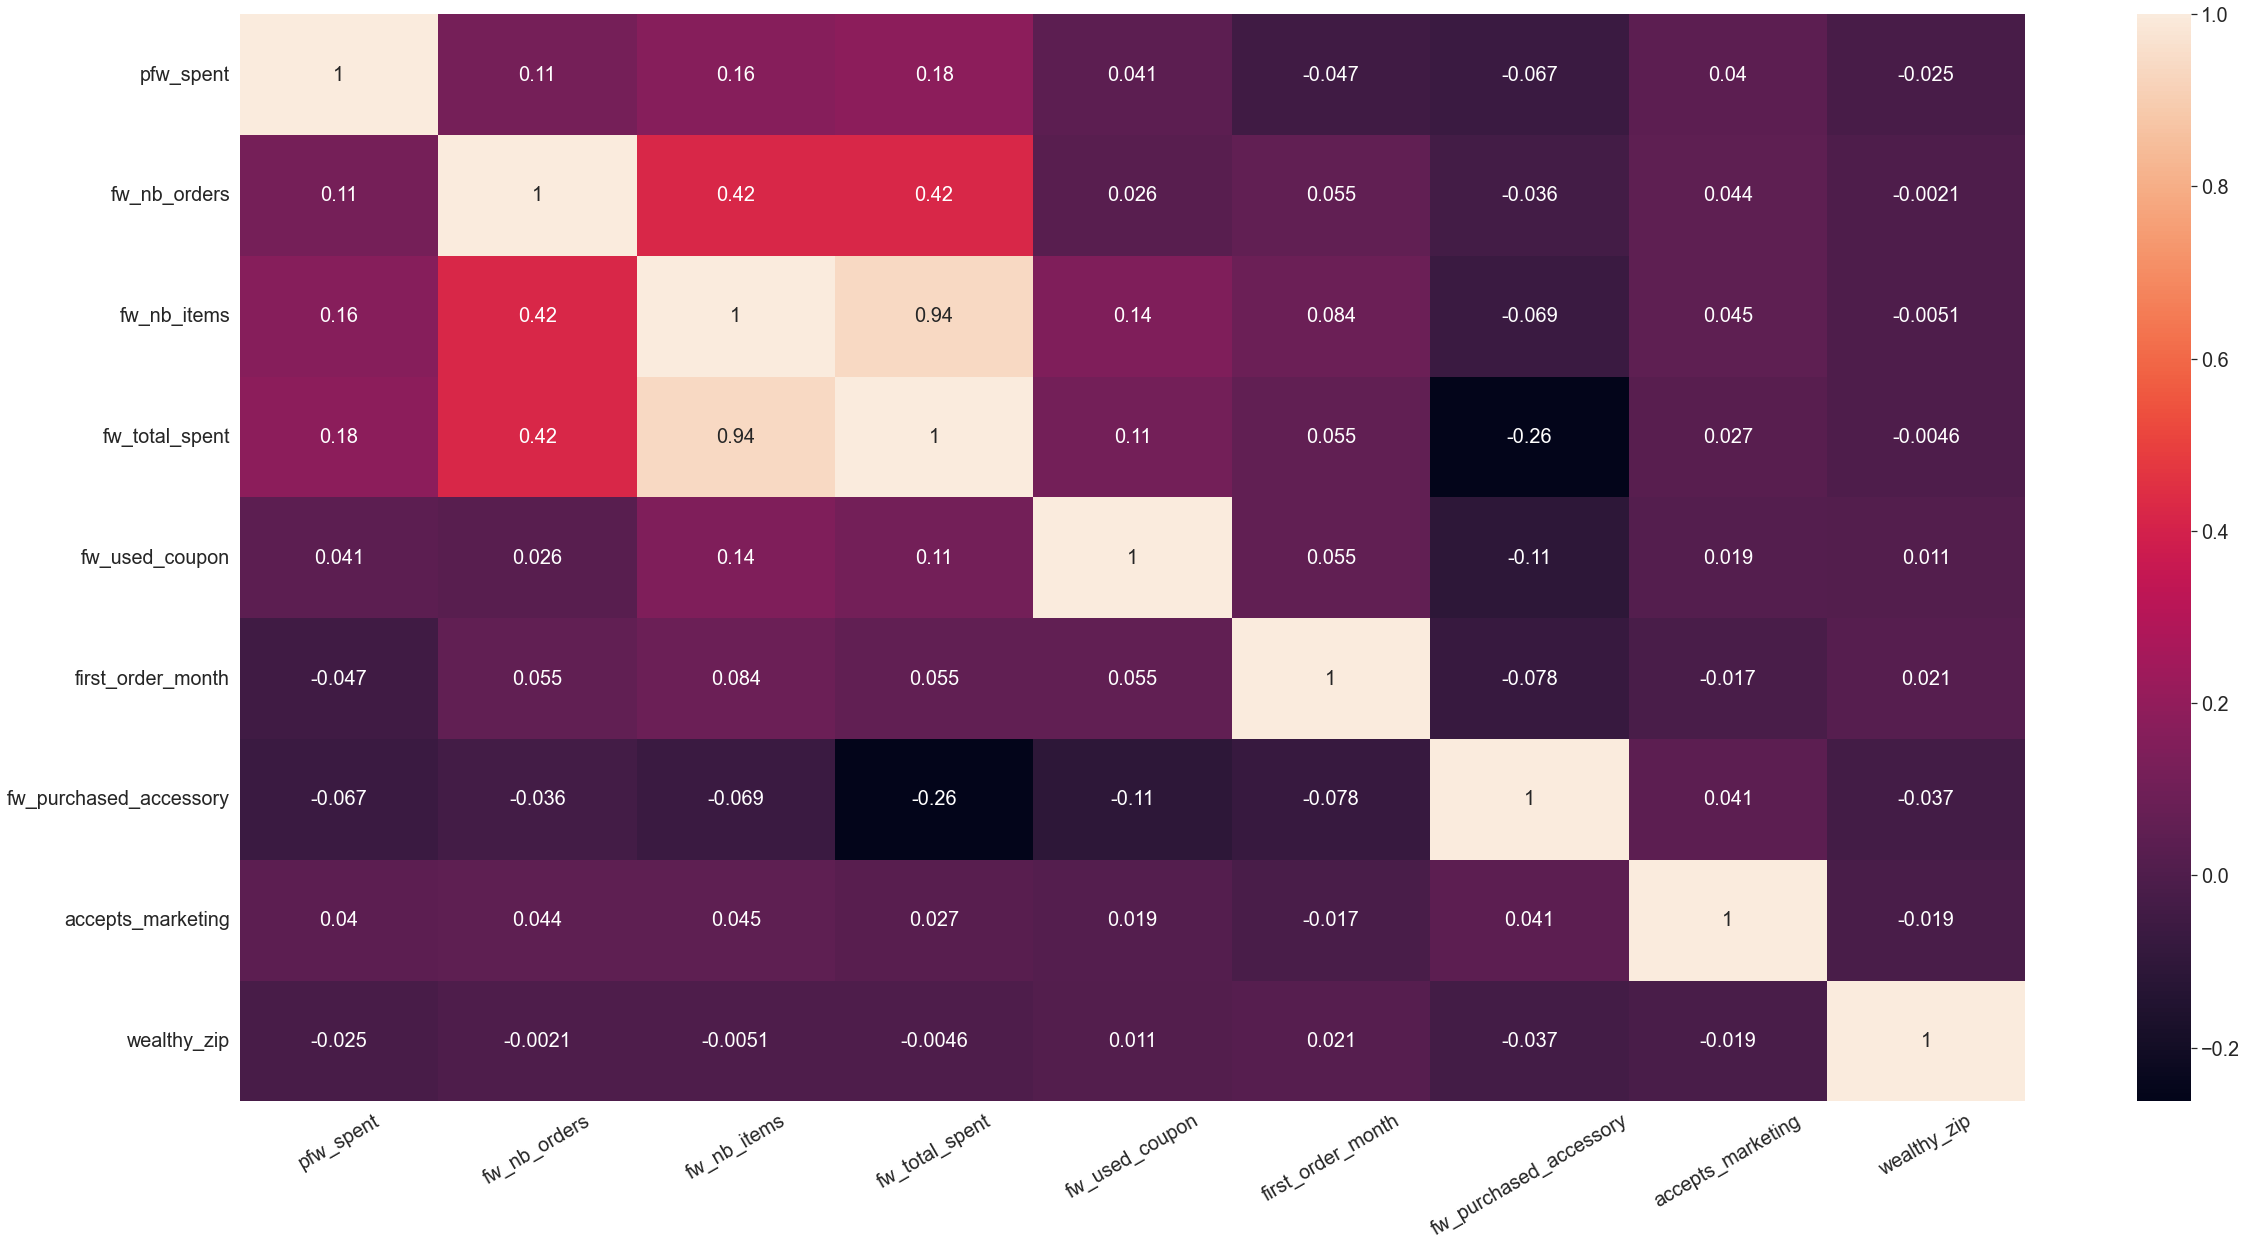

In [33]:
plt.figure(figsize =(40,20))
sns.set(font_scale=1.8)
sns.heatmap(customer_cltv.corr(), annot =True,annot_kws={"size":20})
plt.xticks(rotation=30) 
plt.show()

[]

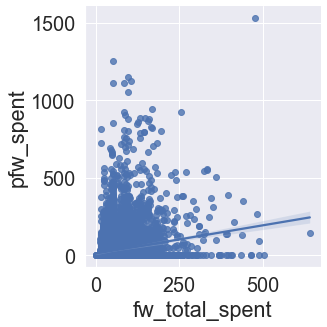

In [40]:
sns.lmplot(x= 'fw_total_spent',y='pfw_spent', data = customer_cltv)
plt.plot()

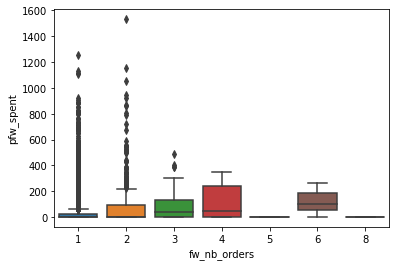

In [24]:
sns.boxplot(x= 'fw_nb_orders',y='pfw_spent', data = customer_cltv)
plt.show()

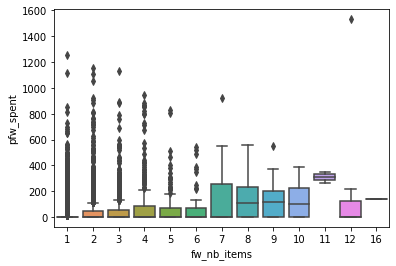

In [23]:
sns.boxplot(x= 'fw_nb_items',y='pfw_spent', data = customer_cltv)
plt.show()

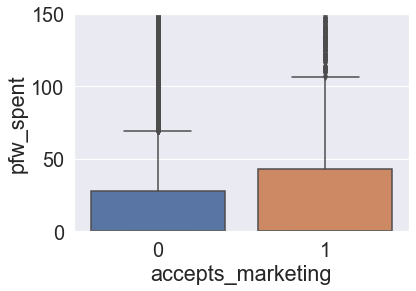

In [46]:
sns.boxplot(x= 'accepts_marketing',y='pfw_spent', data = customer_cltv)
plt.ylim(0, 150)
plt.show()

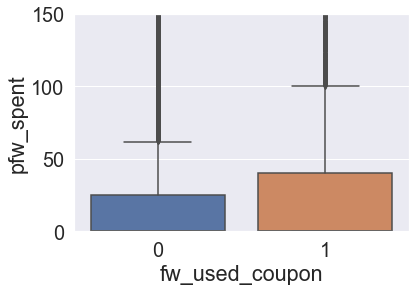

In [47]:
sns.boxplot(x= 'fw_used_coupon',y='pfw_spent', data = customer_cltv)
plt.ylim(0, 150)
plt.show()

In [57]:
print(customer_cltv[customer_cltv['fw_used_coupon'] == 1]['pfw_spent'].mean())
print(customer_cltv[customer_cltv['fw_used_coupon'] == 0]['pfw_spent'].mean())

42.652865288667144
33.966827577352674


In [58]:
customer_cltv[customer_cltv['fw_used_coupon'] == 1]['pfw_spent']

8         924.00
12        858.30
20        681.75
23       1530.20
25        521.15
          ...   
10576       0.00
10578       0.00
10580       0.00
10583       0.00
10593       0.00
Name: pfw_spent, Length: 2806, dtype: float64

In [61]:
customer_cltv[customer_cltv['fw_used_coupon'] == 0]['pfw_spent']

0        1257.80
1         436.15
2        1052.75
3         728.10
4        1114.75
          ...   
10589       0.00
10590       0.00
10591       0.00
10592       0.00
10594       0.00
Name: pfw_spent, Length: 7789, dtype: float64

In [70]:
print(customer_cltv[customer_cltv['pfw_spent'] == 0]['pfw_spent'].count())
print(customer_cltv[customer_cltv['pfw_spent'] > 0]['pfw_spent'].count())

7719
2876


In [77]:
no_spend_coup = customer_cltv[(customer_cltv['pfw_spent'] == 0) &(customer_cltv['fw_used_coupon'] == 1)]['pfw_spent']
spend_coupon = customer_cltv[(customer_cltv['pfw_spent'] > 0)&(customer_cltv['fw_used_coupon'] == 1)]['pfw_spent']
no_spend_no_coup = customer_cltv[(customer_cltv['pfw_spent'] == 0)&(customer_cltv['fw_used_coupon'] == 0)]['pfw_spent']
spend_no_coup = customer_cltv[(customer_cltv['pfw_spent'] > 0)&(customer_cltv['fw_used_coupon'] == 0)]['pfw_spent']

In [84]:
print('Did spend pfw & coupon fw: ' + str(spend_coupon.count()))
print('Did spent pfw & no coupon fw: ' + str(spend_no_coup.count()))
print('Did not spend pfw & coupon fw: ' + str(no_spend_coup.count()))
print('Did not spend pfw & no coupon fw: ' + str(no_spend_no_coup.count()))

Did spend pfw & coupon fw: 828
Did spent pfw & no coupon fw: 2048
Did not spend pfw & coupon fw: 1978
Did not spend pfw & no coupon fw: 5741


In [86]:
print('Did spend pfw & coupon fw: ' + str(spend_coupon.mean()))
print('Did spent pfw & no coupon fw: ' + str(spend_no_coup.mean()))
print('Did not spend pfw & coupon fw: ' + str(no_spend_coup.mean()))
print('Did not spend pfw & no coupon fw: ' + str(no_spend_no_coup.mean()))

Did spend pfw & coupon fw: 144.54582125603866
Did spent pfw & no coupon fw: 129.183408203125
Did not spend pfw & coupon fw: 0.0
Did not spend pfw & no coupon fw: 0.0


if they used a coupon, what is the likelihood that they purchased after the first week 